In [6]:
# 在linux上面运行
import numpy as np
import cv2
import math
import matplotlib
import serial
import time
from Vision_Net import FastestDet
from matplotlib import pyplot as plt

#   git config --global user.email "you@example.com"
#   git config --global user.name "rogrtssccot"

In [7]:

# 获取并处理图像
def get_image():
    # 开全局变量处理，分理处红绿蓝
    global image, image_red, image_green, image_blue
    # 从摄像头获取图像
    image=cv2.imread('try.jpg')
    image_red=image[:,:,2].astype(np.float32)
    image_green=image[:,:,1].astype(np.float32)
    image_blue=image[:,:,0].astype(np.float32)
    #cv2.imshow('image',image)
    #cv2.waitKey(1)

# 突出图像中的红色目标
def get_red():
    global image, image_red, image_green, image_blue
    image_red_only=image_red*2-image_blue-image_green
    image_red_only[image_red_only<0]=0
    return image_red_only

# 突出图像中的绿色目标
def get_green():
    global image, image_red, image_green, image_blue
    image_green_only=image_green*2-image_blue-image_red
    image_green_only[image_green_only<0]=0
    return image_green_only

# 突出图像中的蓝色目标
def get_blue():
    global image, image_red, image_green, image_blue
    image_blue_only=image_blue*2-image_blue-image_red
    image_blue_only[image_blue_only<0]=0
    return image_blue_only

# 突出目标颜色
def find_aim_color(aim_color):
    if aim_color == 'R':
        return get_red()
    if aim_color == 'G':
        return get_green()
    if aim_color == 'B':
        return get_blue()
    else:
        return get_blue()

# 展示图片
def show_image(image):
    image_show=image.astype(np.uint8)
    plt.imshow(image_show, cmap='gray')
    plt.axis('off')  # 不显示坐标轴
    plt.show()

In [8]:
get_image()

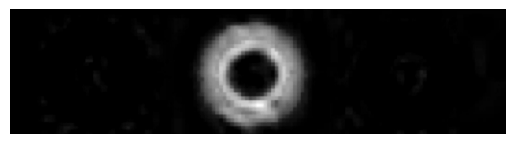

In [10]:
photo=find_aim_color('G')
photo=(photo/np.max(photo))*255
show_image(photo)